# 2. Evaluation of final performance

This file evaluates the final performance of our models on the test data based on MSE, MAE and R^2. We want to filter for different experimental parameter combinations and the plots are displayed by using the difference of scores when comparing stratified vs. unstratified models.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
# remove waringns
import warnings
warnings.filterwarnings("ignore")


from utils_evaluation import flatten_data, generate_hyperparameter_combinations_dict

In [37]:
def read_data(json_path):
    json_files = os.listdir(json_path)
    data = []
    for file in json_files:
        with open(json_path + file) as f:
            data_new = json.load(f)
            data = data + data_new
    # flatten dictionary and convert to dataframe
    data_all_flatten, keys_dic = flatten_data(data)
    data = pd.DataFrame(data_all_flatten)
    return data


In [38]:
json_path ="../results/rf/"
json_path_xgb = "../results/xgb/"

data_rf = read_data(json_path)
data_xgb = read_data(json_path_xgb)

print('\nData Loading from json file:')
print('Loaded Random Forest data from json file: shape', data_rf.shape)
print('Loaded XGBoost data from json file: shape', data_xgb.shape)


Data Loading from json file:
Loaded Random Forest data from json file: shape (4800, 75)
Loaded XGBoost data from json file: shape (4800, 87)


In [ ]:
''' variables: 'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae','''

In [4]:
data_rf.columns

Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterations_mean_score_time',
       'cv_unstratifie

## 2.1 Final Performance of Random Forest

In [39]:
data_rf_final = data_rf[['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae']]

In [40]:
data_rf_final['strat-unstrat_test_mse'] = data_rf_final['stratified_results_test mse'] - data_rf_final['unstratified_results_test mse']
data_rf_final['strat-unstrat_test_r2'] = data_rf_final['stratified_results_test r2'] - data_rf_final['unstratified_results_test r2']
data_rf_final['strat-unstrat_test_mae'] = data_rf_final['stratified_results_test mae'] - data_rf_final['unstratified_results_test mae'] 

In [41]:
data_rf_final['combined_info'] = data_rf_final['model_info_model'] + '_' + data_rf_final['model_info_transformation'] + '_'+ data_rf_final['model_info_n_train'].astype(str) + '_' + data_rf_final['model_info_noise'].astype(str) + '_' + data_rf_final['model_info_group_size'].astype(str)


In [47]:
print(data_rf_final.shape)
data_rf_final.head()[['combined_info', 'strat-unstrat_test_mse', 'strat-unstrat_test_r2', 'strat-unstrat_test_mae','hyperparameters_same',
       #'unstratified_results_train r2', 'unstratified_results_test r2',
       #'unstratified_results_train mse', 'unstratified_results_test mse',
       #'unstratified_results_train mae', 'unstratified_results_test mae',
       #'stratified_results_train r2', 'stratified_results_test r2',
       #'stratified_results_train mse', 'stratified_results_test mse',
       #'stratified_results_train mae', 'stratified_results_test mae'
                      ]]

(4800, 32)


,combined_info,strat-unstrat_test_mse,strat-unstrat_test_r2,strat-unstrat_test_mae,hyperparameters_same
0,rf_identity_200_0_5,0.172560,-0.007227,0.021279,False
1,rf_identity_200_0_5,0.000000,0.000000,0.000000,True
2,rf_identity_200_0_5,-0.074262,0.003110,-0.010299,False
3,rf_identity_200_0_5,-0.294275,0.012325,-0.060274,False
4,rf_identity_200_0_5,0.036031,-0.001509,0.007784,False


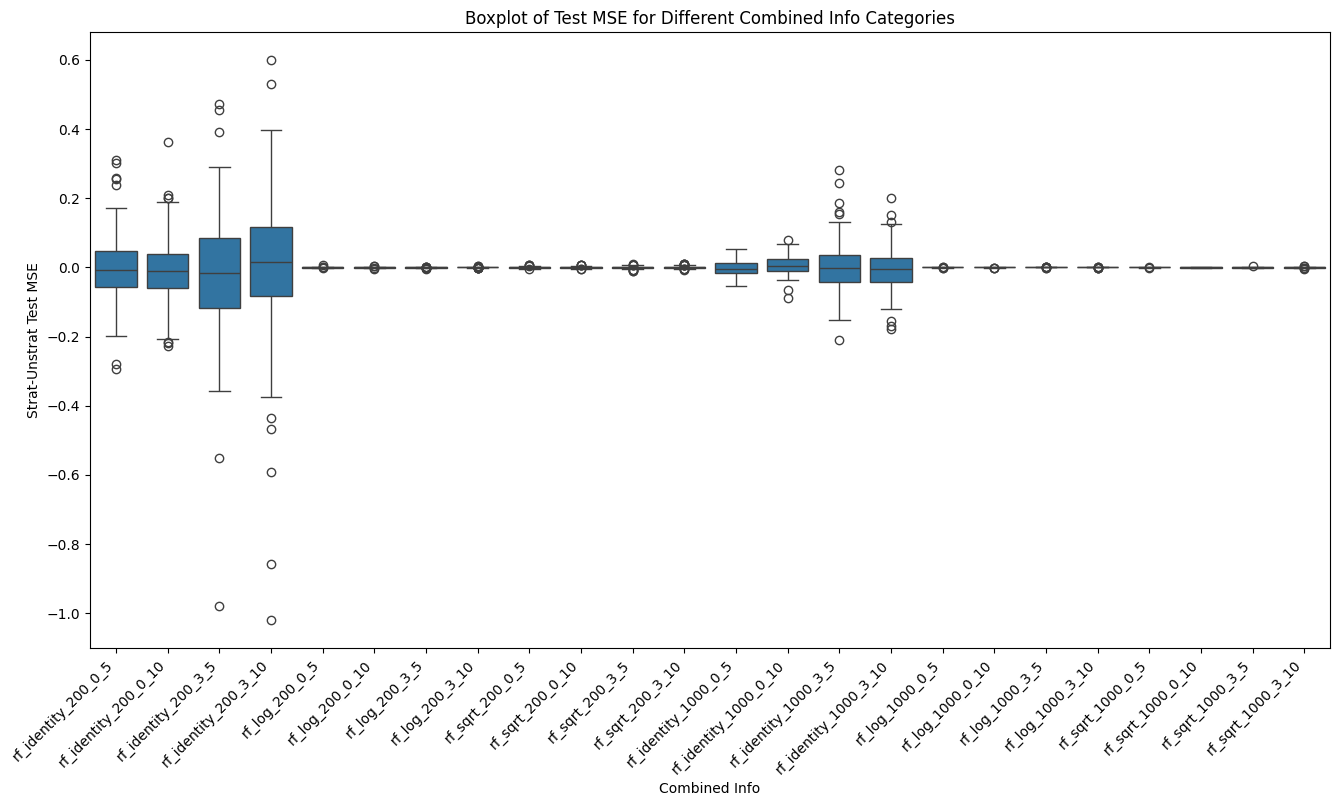

In [51]:
# Create a boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(x='combined_info', y='strat-unstrat_test_mse', data=data_rf_final[data_rf_final['hyperparameters_same'] == False])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Boxplot of Test MSE for Different Combined Info Categories')
plt.xlabel('Combined Info')
plt.ylabel('Strat-Unstrat Test MSE')
#plt.legend(title='Hyperparameters Same', loc='upper right')
plt.show()

In [34]:

def barplot_one_var(df, var, title, y_label):
    #df_sorted = df.sort_values(by=var)

    if title == 'Random Forest':
        color = 'darkgreen'
    else:
        color = 'green'

    # Barplot
    plt.figure(figsize=(10, 3))  # Adjust figure size as needed
    plt.bar(df['combined_info'], df[var], color= color)
    plt.xlabel('Experimental Parameter Combination')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(df['combined_info'], rotation=90)  #
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 3))  # Adjust figure size as needed
    sns.boxplot(x=var, data=df, color='darkgreen')
    plt.xlabel(y_label)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # stats
    stats = df[var].describe()
    return stats

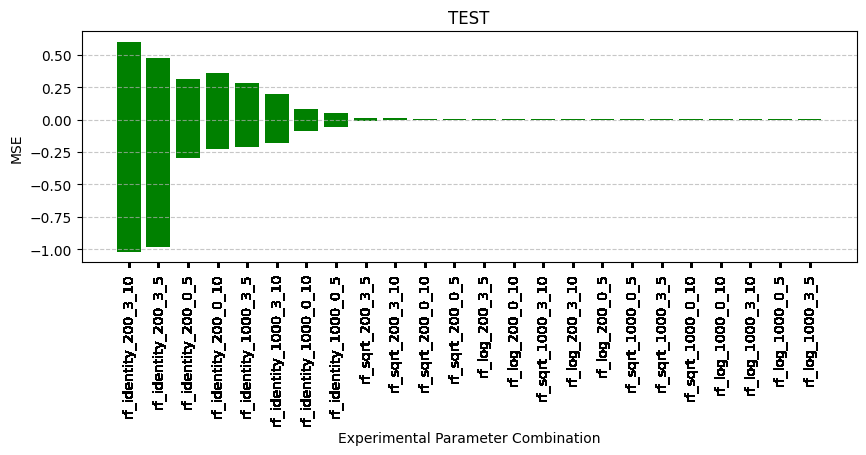

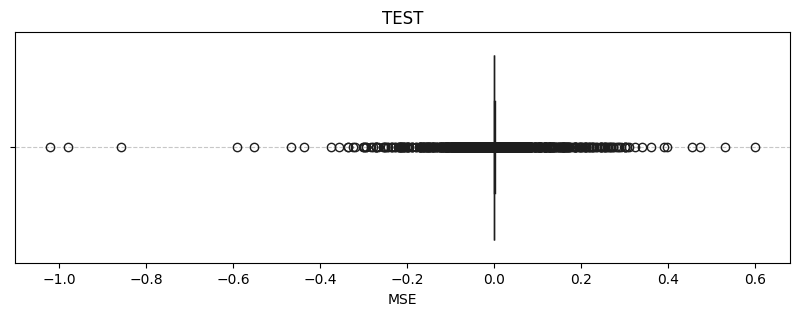

count    4800.000000
mean       -0.000570
std         0.058632
min        -1.020474
25%        -0.000263
50%         0.000000
75%         0.000256
max         0.598748
Name: strat-unstrat_test_mse, dtype: float64

In [35]:
barplot_one_var(data_rf_final, 'strat-unstrat_test_mse', 'TEST', 'MSE')